In [1]:
import csv
from datetime import datetime

import statistics
from matplotlib import pyplot as plt
from collections import namedtuple

# LECTURA

In [2]:
Partido = namedtuple('Partidos', 'Anyo, Jornada, Fecha, Local, GolesLocales, GolesVisitantes, Visitante, Resultado')
def lee_prtd(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de audiencias
    
    ENTRADA: 
       - fichero: nombre del fichero -> str
    SALIDA: 
       - lista de audiencias -> [(int, float)] 

    Cada línea del fichero se corresponde con la audiencia de un programa,
    y se representa con una tupla con los siguientes valores:
        - edición
        - audiencia
    Hay que transformar la entrada (cadenas de caracteres) en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    with open(fichero, encoding='utf-8') as f:
        # Se crea un objeto lector (un iterator) que separará los valores por comas 
        lector = csv.reader(f)
        next(lector)
        # Lista por comprensión sobre el objeto lector
        prtd = [Partido(int(Anyo), int(Jornada), datetime.strptime(Fecha,'%d/%m/%Y'),str(Local), int(GolesLocales), int(GolesVisitantes), str(Visitante), 
                     str(Resultado)) for Anyo, Jornada, Fecha, Local, GolesLocales,
                    GolesVisitantes, Visitante, Resultado in lector]
    return prtd

In [3]:
prtd = lee_prtd('./data/prtd.csv')
print(prtd)

[Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Coventry City', GolesLocales=2, GolesVisitantes=1, Visitante='Middlesbrough', Resultado='H'), Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Leeds United', GolesLocales=2, GolesVisitantes=1, Visitante='Wimbledon', Resultado='H'), Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Sheffield Utd', GolesLocales=2, GolesVisitantes=1, Visitante='Manchester Utd', Resultado='H'), Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Crystal Palace', GolesLocales=3, GolesVisitantes=3, Visitante='Blackburn', Resultado='D'), Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Arsenal', GolesLocales=2, GolesVisitantes=4, Visitante='Norwich City', Resultado='A'), Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Ipswich Town', GolesLocales=1, GolesVisitantes=1, V

# FILTRADO Y TRUNCAMIENTO

In [4]:
def filtra_por_jornada(partidos, jornada, anyo):
    return [p.Local for p in partidos if (jornada==p.Jornada and anyo==p.Anyo)]

In [5]:
print (filtra_por_jornada(prtd, 1, 2004))

['Blackburn', 'Leicester City', 'Birmingham City', 'Arsenal', 'Portsmouth', 'Manchester Utd', 'Fulham', 'Liverpool', 'Leeds United', 'Charlton Ath']


# ORDENAR Y MAXIMOS

In [6]:
def ordena_por_goles(partidos):
    return partidos[4]

sorted(prtd[:6], key=ordena_por_goles)

[Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Ipswich Town', GolesLocales=1, GolesVisitantes=1, Visitante='Aston Villa', Resultado='D'),
 Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Coventry City', GolesLocales=2, GolesVisitantes=1, Visitante='Middlesbrough', Resultado='H'),
 Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Leeds United', GolesLocales=2, GolesVisitantes=1, Visitante='Wimbledon', Resultado='H'),
 Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Sheffield Utd', GolesLocales=2, GolesVisitantes=1, Visitante='Manchester Utd', Resultado='H'),
 Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Arsenal', GolesLocales=2, GolesVisitantes=4, Visitante='Norwich City', Resultado='A'),
 Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Crystal Palace', GolesLocales=3, GolesVisitant

In [7]:
sorted(prtd, reverse=True, key=lambda x:x.GolesLocales)[:6]

[Partidos(Anyo=1995, Jornada=32, Fecha=datetime.datetime(1995, 3, 4, 0, 0), Local='Manchester Utd', GolesLocales=9, GolesVisitantes=0, Visitante='Ipswich Town', Resultado='H'),
 Partidos(Anyo=2010, Jornada=13, Fecha=datetime.datetime(2009, 11, 22, 0, 0), Local='Tottenham', GolesLocales=9, GolesVisitantes=1, Visitante='Wigan Athletic', Resultado='H'),
 Partidos(Anyo=2021, Jornada=22, Fecha=datetime.datetime(2021, 2, 2, 0, 0), Local='Manchester Utd', GolesLocales=9, GolesVisitantes=0, Visitante='Southampton', Resultado='H'),
 Partidos(Anyo=2000, Jornada=8, Fecha=datetime.datetime(1999, 9, 19, 0, 0), Local='Newcastle Utd', GolesLocales=8, GolesVisitantes=0, Visitante='Sheffield Weds', Resultado='H'),
 Partidos(Anyo=2008, Jornada=38, Fecha=datetime.datetime(2008, 5, 11, 0, 0), Local='Middlesbrough', GolesLocales=8, GolesVisitantes=1, Visitante='Manchester City', Resultado='H'),
 Partidos(Anyo=2010, Jornada=38, Fecha=datetime.datetime(2010, 5, 9, 0, 0), Local='Chelsea', GolesLocales=8, Gole

In [8]:
partidoscongoles = []

def partido_mas_goles(lista):
    partidoscongoles.clear()
    for elemento in lista:
        if partidoscongoles ==[]:
            partidoscongoles.append(elemento)
        else:
            if elemento.GolesLocales > partidoscongoles[0].GolesLocales:
                partidoscongoles.clear() 
                partidoscongoles.append(elemento)
            elif elemento.GolesLocales == partidoscongoles[0].GolesLocales:
                partidoscongoles.append(elemento)
            else:
                continue 
    return partidoscongoles

In [9]:
partido_mas_goles(prtd)

[Partidos(Anyo=1995, Jornada=32, Fecha=datetime.datetime(1995, 3, 4, 0, 0), Local='Manchester Utd', GolesLocales=9, GolesVisitantes=0, Visitante='Ipswich Town', Resultado='H'),
 Partidos(Anyo=2010, Jornada=13, Fecha=datetime.datetime(2009, 11, 22, 0, 0), Local='Tottenham', GolesLocales=9, GolesVisitantes=1, Visitante='Wigan Athletic', Resultado='H'),
 Partidos(Anyo=2021, Jornada=22, Fecha=datetime.datetime(2021, 2, 2, 0, 0), Local='Manchester Utd', GolesLocales=9, GolesVisitantes=0, Visitante='Southampton', Resultado='H')]

In [10]:
partidoscongolesv = []

def partido_mas_golesv(lista):
    partidoscongolesv.clear()
    for elemento in lista:
        if partidoscongolesv ==[]:
            partidoscongolesv.append(elemento)
        else:
            if elemento.GolesVisitantes > partidoscongolesv[0].GolesVisitantes:
                partidoscongolesv.clear() 
                partidoscongolesv.append(elemento)
            elif elemento.GolesVisitantes == partidoscongolesv[0].GolesVisitantes:
                partidoscongolesv.append(elemento)
            else:
                continue 
    return partidoscongolesv

In [11]:
partido_mas_golesv(prtd)

[Partidos(Anyo=2020, Jornada=10, Fecha=datetime.datetime(2019, 10, 25, 0, 0), Local='Southampton', GolesLocales=0, GolesVisitantes=9, Visitante='Leicester City', Resultado='A')]

# AGRUPACIÓN 

In [12]:
partidos_por_resultados= dict()
resultados= {p.Resultado for p in prtd}
for g in resultados:
    partidos_por_resultados[g] = [p for p in prtd if p.Resultado==g]
    
partidos_por_resultados    

{'D': [Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Crystal Palace', GolesLocales=3, GolesVisitantes=3, Visitante='Blackburn', Resultado='D'),
  Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Ipswich Town', GolesLocales=1, GolesVisitantes=1, Visitante='Aston Villa', Resultado='D'),
  Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Everton', GolesLocales=1, GolesVisitantes=1, Visitante='Sheffield Weds', Resultado='D'),
  Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Southampton', GolesLocales=0, GolesVisitantes=0, Visitante='Tottenham', Resultado='D'),
  Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 15, 0, 0), Local='Chelsea', GolesLocales=1, GolesVisitantes=1, Visitante='Oldham Athletic', Resultado='D'),
  Partidos(Anyo=1993, Jornada=1, Fecha=datetime.datetime(1992, 8, 17, 0, 0), Local='Manchester City', GolesLocales=1, GolesVis

# AGREGACIÓN(MEDIA)

In [13]:
media_de_goles_por_resultado= dict()
for g in partidos_por_resultados.keys():
    media_de_goles_por_resultado[g]=(sum(p.GolesLocales for p in partidos_por_resultados[g])+sum(p.GolesVisitantes for p in partidos_por_resultados[g])) /len(partidos_por_resultados[g])
media_de_goles_por_resultado

{'D': 1.9382059800664453, 'A': 2.840654347167525, 'H': 2.9572633552014995}

# VISUALIZACIÓN

In [14]:
def evolucion_GolesLocales(lista, Anyo):
    partidos = [p.GolesLocales for p in lista if p.Anyo==Anyo]
    plt.plot(partidos, label='GolesLocales')
    plt.legend()
    plt.show()
    

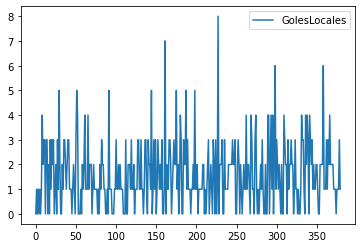

In [15]:
evolucion_GolesLocales(prtd, 2012)